In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

**EDGE** **DETECTION**

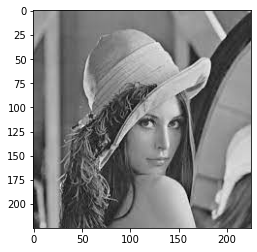

In [ ]:
lana=cv2.imread('lana.jfif',-1)
plt.imshow(lana)

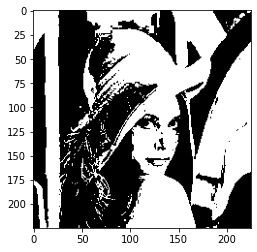

In [ ]:
ret,bw_image=cv2.threshold(lana,127,255,cv2.THRESH_BINARY)
plt.imshow(bw_image)

In [ ]:
img = bw_image[:,:,0]//255

In [ ]:
def edge_detection(img):
  l,b=img.shape
  #print(np.unique(img))
  new_image=np.zeros((l,b)).astype(np.uint8)

  for i in range(1,l-1):
    for j in range(1,b-1):
      max_ = max(img[i+1][j],img[i-1][j],img[i][j+1],img[i][j-1])
      min_ = min(img[i+1][j],img[i-1][j],img[i][j+1],img[i][j-1])
      max_min = max_-min_
      if img[i][j]<=max_min:
        new_image[i][j] = img[i][j]
      else :  
        new_image[i][j] = max_min 
  return new_image

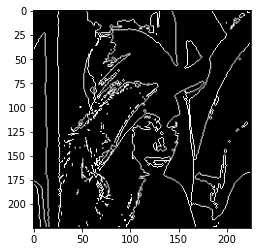

In [ ]:
image = edge_detection(img)
plt.imshow(image,cmap="gray")

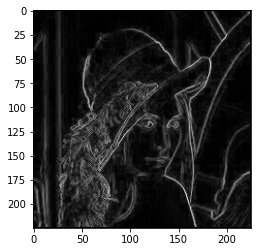

In [ ]:
image = edge_detection(lana[:,:,0])
plt.imshow(image,cmap="gray")

**IMAGE DENOISING**


In [ ]:
def sp_noise(image,prob): 
  output = np.zeros(image.shape,np.uint8)
  thres = 1 - prob 
  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          rdn = random.random()
          if rdn < prob:
              output[i][j] = 0
          elif rdn > thres:
              output[i][j] = 255
          else:
              output[i][j] = image[i][j]
  return output

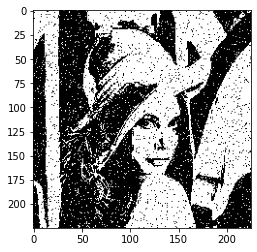

In [ ]:
sp_img = sp_noise(bw_image[:,:,0],0.05)
plt.imshow(sp_img,cmap='gray')

In [ ]:
def denoise(img):
  x,y=img.shape
  new_img=np.zeros((x-2,y-2))
  new_img=img[0:x-2,0:y-2]+img[0:x-2,1:y-1]+img[0:x-2,2:y]+img[1:x-1,0:y-2]+img[1:x-1,2:y]+img[2:x,0:y-2]+img[2:x,1:y-1]+img[2:x,2:y]
  for i in range(1,x-1):
    for j in range(1,y-1):
      if img[i][j]==1:
        if new_img[i-1][j-1]<=2:
          img[i][j]=0
      else :
        if new_img[i-1][j-1]>=6:
          img[i][j]=1    
  return img

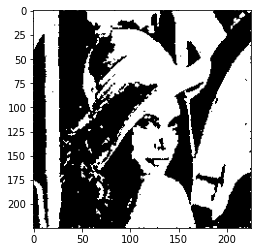

In [ ]:
img=denoise(sp_img//255)
plt.imshow(img, cmap='gray')

**IMAGE TRANSLATION**

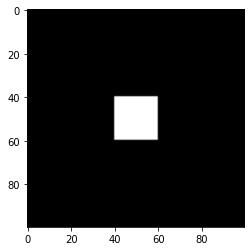

In [ ]:
import numpy as np
box=np.zeros((100,100))
for i in range(40,60):
  for j in range(40,60):
    box[i][j]=1;
    
import matplotlib.pyplot as plt
plt.imshow(box, cmap='gray')

In [ ]:
def translation(img,rule,steps):
  new_img=np.zeros((100,100))
  #if rule==2:
  for step in range(steps):
    for i in range(1,99):
      for j in range(1,99):
        new_img[i][j]=img[i][j+1]
    img=new_img    
  return new_img

In [ ]:
def translation(img,rules,steps):
  x,y=img.shape
  for step in range(steps):
    new_img=np.zeros((x-2,y-2,len(rules))).astype(int)
    i=0
    if 1 in rules:
      new_img[:,:,i]=img[1:x-1,1:y-1]
      i=i+1
    if 2 in rules:
      new_img[:,:,i]=img[1:x-1,2:y]
      i=i+1 
    if 4 in rules:
      new_img[:,:,i]=img[2:x,2:y]
      i=i+1
    if 8 in rules:
      new_img[:,:,i]=img[2:x,1:y-1]
      i=i+1   
    if 16 in rules:
      new_img[:,:,i]=img[2:x,0:y-2]
      i=i+1
    if 32 in rules:
      new_img[:,:,i]=img[1:x-1,0:y-2]
      i=i+1   
    if 64 in rules:
      new_img[:,:,i]=img[0:x-2,0:y-2]
      i=i+1
    if 128 in rules:
      new_img[:,:,i]=img[0:x-2,1:y-1]
      i=i+1   
    if 256 in rules:
      new_img[:,:,i]=img[0:x-2,2:y]
      i=i+1
    if len(rules)==1:
      img[1:x-1,1:y-1]=new_img[:,:,0]  
    if len(rules)==2:
      img[1:x-1,1:y-1]=new_img[:,:,0]^new_img[:,:,1]
    if len(rules)>2 :
      temp = new_img[:,:,0]^new_img[:,:,1]
      for j in range(len(rules)-2):
        temp=temp^new_img[:,:,j+2]
      img[1:x-1,1:y-1]=temp

  return img  
      


In [ ]:
img=translation(box,[2],10)

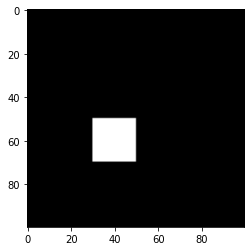

In [ ]:
img=translation(box.astype(int),[128],10)
plt.imshow(img,cmap='gray')

**IMAGE THINNING**

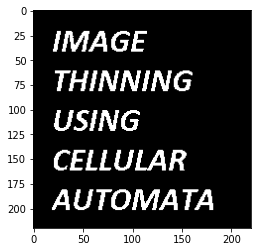

In [ ]:
thinn = cv2.imread('/content/Thinnng.jpg',-0)
ret,bw_image=cv2.threshold(thinn,127,255,cv2.THRESH_BINARY)
img = 1 - bw_image//255
plt.imshow(img,cmap='gray')

In [ ]:
def thinning(img,iter):
  x,y=img.shape
  for step in range(iter) :
    new_img = np.zeros((x,y))      
    for i in range(1,x-1):
      for j in range(1,y-1):
        if img[i][j]==1:
          neigh=[img[i-1,j-1],img[i-1,j],img[i-1,j+1],img[i,j+1],img[i+1,j+1],img[i+1,j],img[i+1,j-1],img[i,j-1]]
          #print(neigh)
          new_img[i][j]=checkstring(neigh)
    img=new_img      
  return img      

In [ ]:
def checkstring(strr):
  sum_=sum(strr)
  if sum_>6:
    return 1
  elif  sum_<3 :
    return 1  
  else:
    if strr[0]==1 and strr[-1]==0 :
      l=0
      for i in range(8):
        if strr[i]==1:
          l=l+1
        if strr[i]==0:
          if l==sum_:
            return 0
          else :
            return 1 
      
    if strr[0]==1 and strr[-1]==1:
      l=0
      for i in range(8):     
        if strr[i]==1:
          start=i
          break
      for j in range(8):
        #i=j%8
        if strr[start-j]==1:
          l=l+1
        if strr[start-j]==0:
          if l==sum_:
            return 0
          else :
            return 1      

    if strr[0]==0 :
      l=0
      for i in range(8):     
        if strr[i]==1:
          start=i 
          break 
      for i in range(start,8):
        if strr[i]==1:
          l=l+1
        if strr[i]==0:
          if l==sum_:
            return 0
          else :
            return 1   
  return 0              

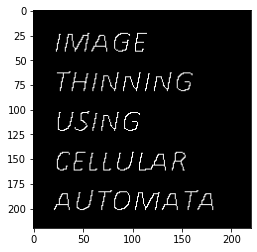

In [ ]:
image=thinning(img,15)
plt.imshow(image,cmap='gray')

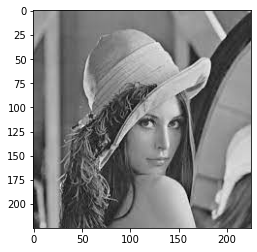

In [ ]:
lana=cv2.imread('lana.jfif',-1)
plt.imshow(lana)

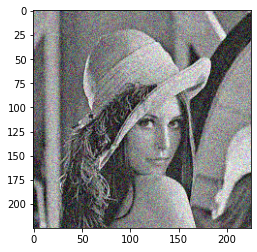

In [ ]:
noise = np.random.normal(0, 24, lana.shape)
#noise.astype('uint8')
new = lana+noise
new = np.clip(new,0,255)
new = new.astype('uint8')
plt.imshow(new)

In [ ]:
new

array([[[169,   5, 134],
        [193, 136, 165],
        [ 96, 122, 220],
        ...,
        [155, 137, 194],
        [150, 217, 191],
        [111, 140, 128]],

       [[184, 192, 234],
        [165, 188, 175],
        [203, 255, 118],
        ...,
        [224,  92, 220],
        [117, 255, 217],
        [176, 157, 151]],

       [[215, 181, 167],
        [196, 178, 218],
        [182, 172, 110],
        ...,
        [210, 170, 151],
        [146, 151, 156],
        [ 37,  54, 122]],

       ...,

       [[ 78,  96,  33],
        [ 80,   0,  40],
        [ 31, 113,  46],
        ...,
        [133,  30,  78],
        [ 25,  82,  46],
        [ 78,  95,  98]],

       [[ 26,  29,  90],
        [  0,  18,   6],
        [ 34,  43,  18],
        ...,
        [ 60,  91,  79],
        [145,  38,  79],
        [187,  96, 113]],

       [[ 61,  68,  25],
        [  0,  19,  38],
        [  0,  75,   0],
        ...,
        [ 67, 137,  83],
        [ 79,  26,  77],
        [115, 101, 106]]

In [ ]:
from PIL import Image
lana = Image.open('/content/MLP_image.png')

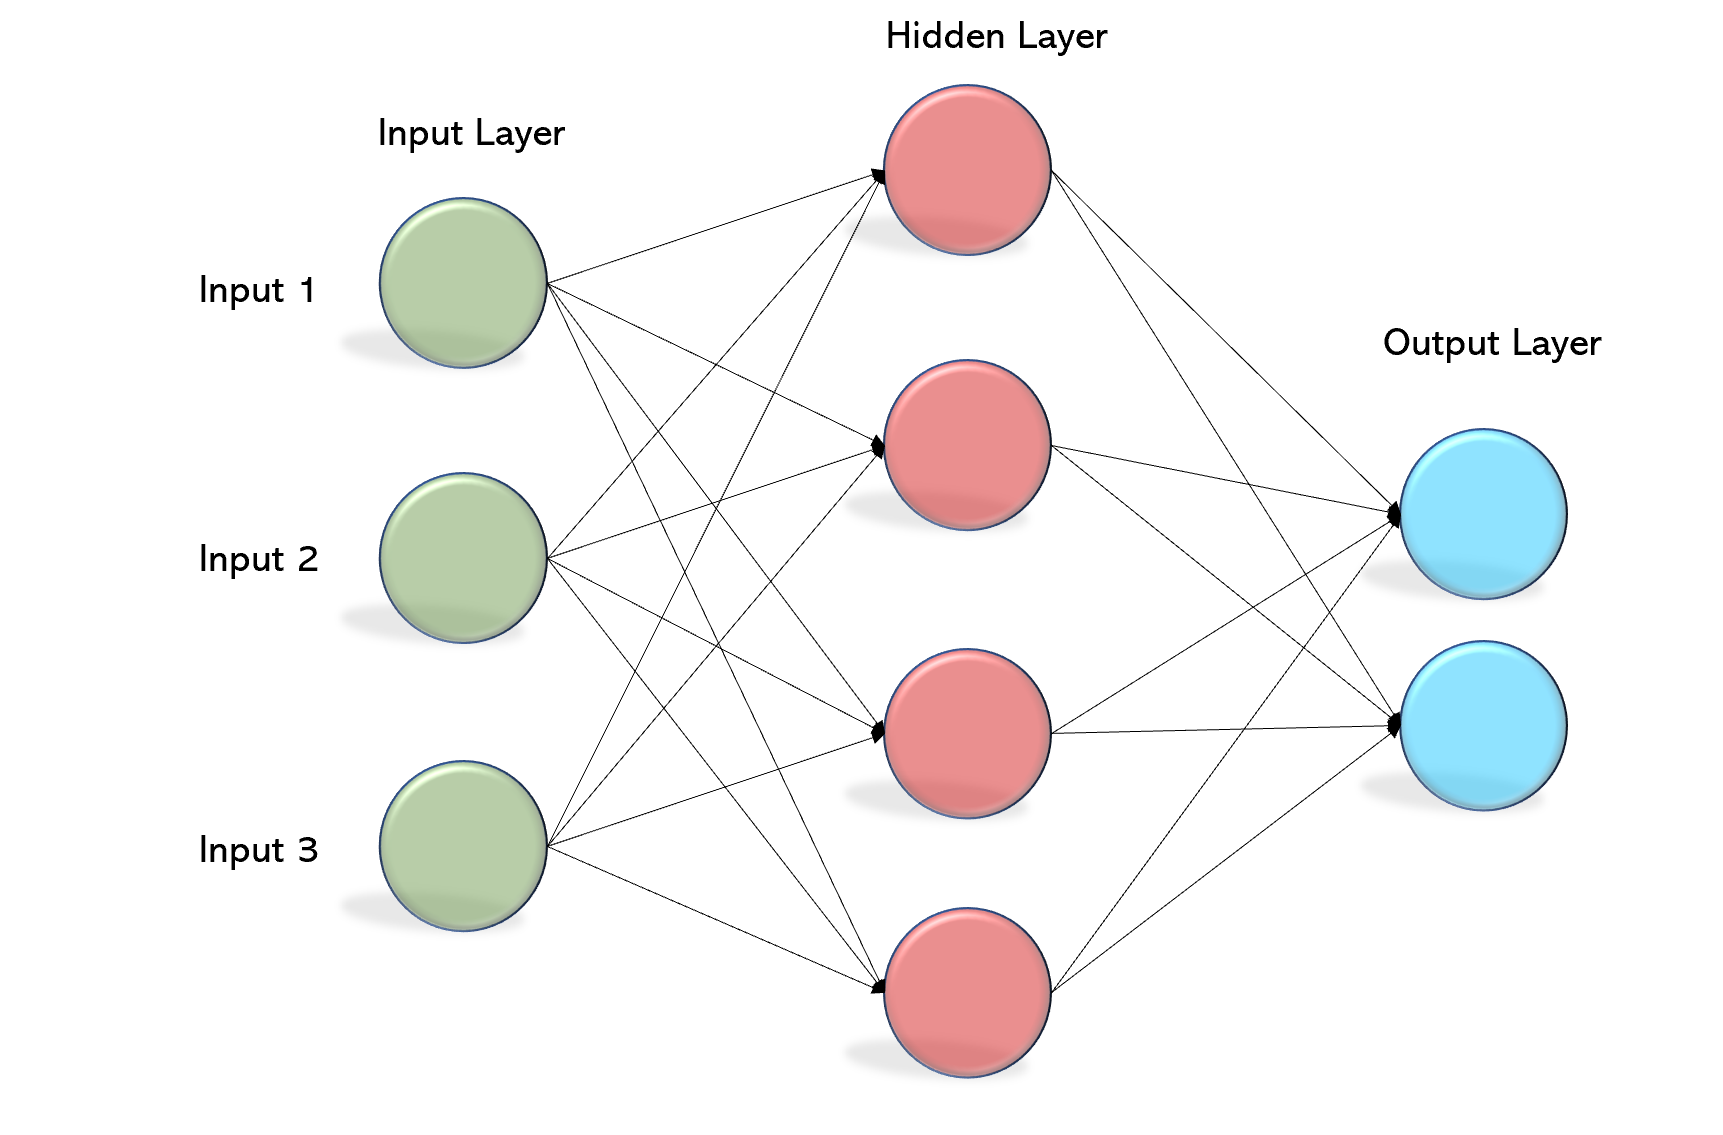

In [ ]:
lana

In [ ]:
np.array(lana).shape

(225, 225, 3)

In [ ]:
noise = np.random.normal(0, 24, np.array(lana).shape)
#noise.astype('uint8')
new = lana+noise
new = np.clip(new,0,255)
new = new.astype('uint8')
#plt.imshow(new)
new = Image.fromarray(new)

In [ ]:
new.save('new.jpg')

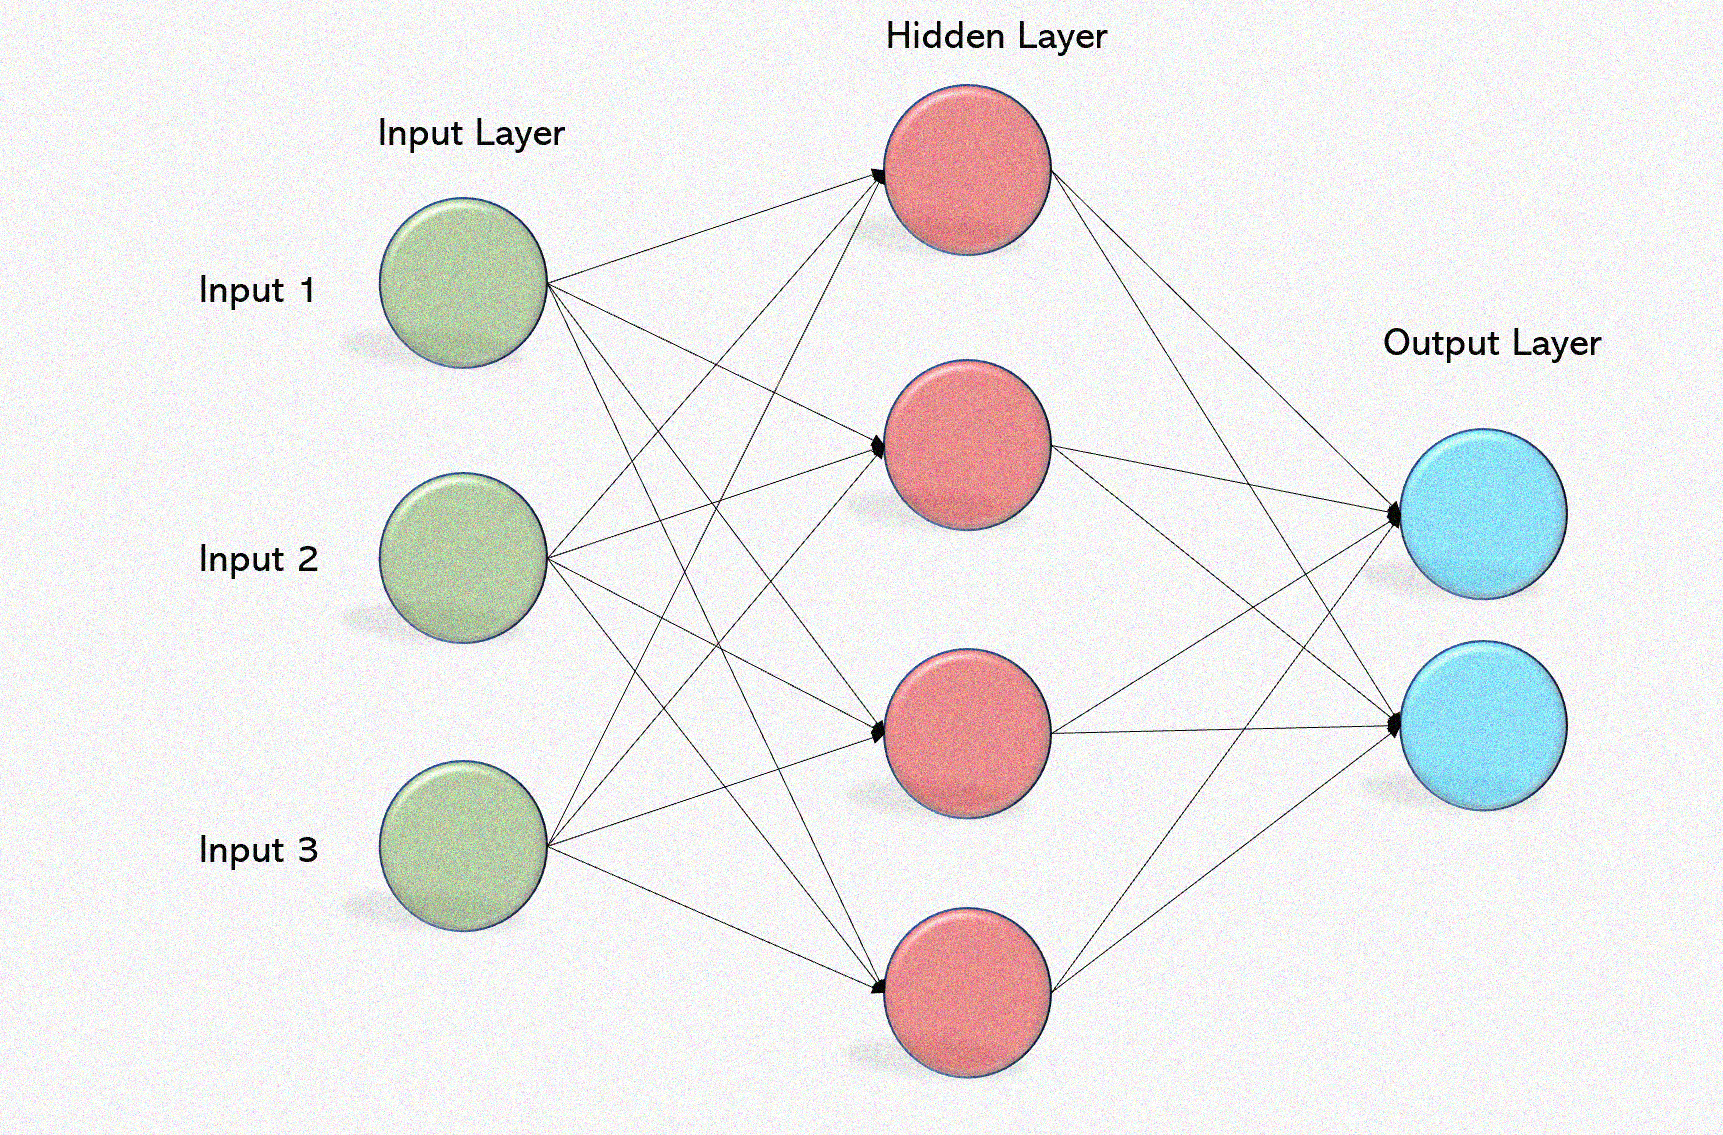

In [ ]:
new